<class 'numpy.ndarray'>
(85, 228, 3)


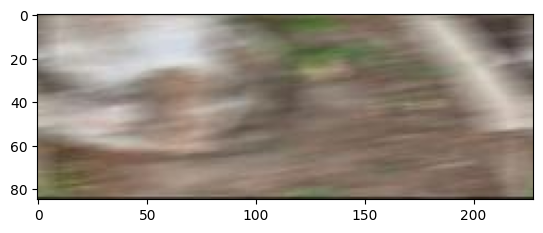

In [12]:
%matplotlib inline
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
#import ipywidgets as widgets
from IPython.display import display
import cv2 as cv
import numpy as np
from utility import util

image1 = cv.imread('../images/2.jpg')
print(type(image1))
print(image1.shape)
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
plt.imshow(image1)

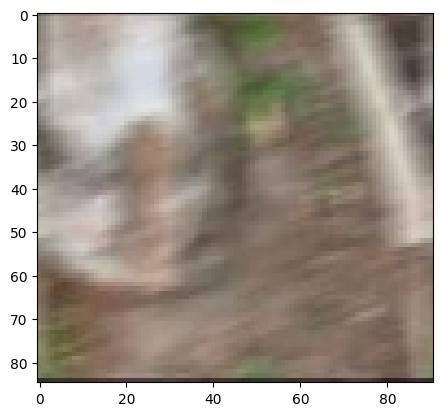

In [13]:
scale_percent = 250  # Процент от изначального размера
width = int(image1.shape[1] * 40 / 100)
height = int(image1.shape[0] * 100 / 100)
dim = (width, height)
resized_image = cv.resize(image1, dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_image)
#resized_image = image1

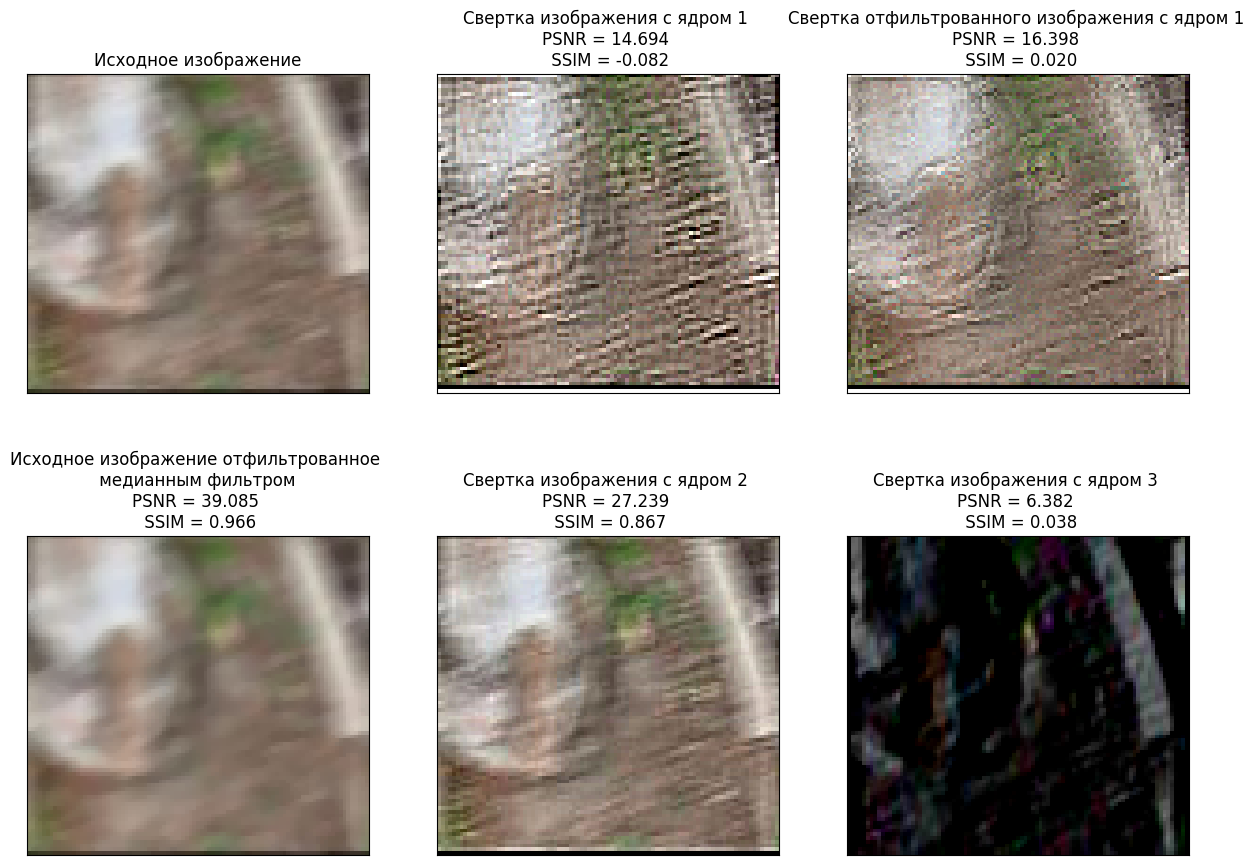

In [14]:
a = 1
b = 2
kernel1 = np.asarray([[a, b, a], [b, -(4*a+4*b - 1), b], [a,b, a]])
kernel2 = np.asarray([[-0.25, -0.25, -0.25], [-0.25, 3, -0.25], [-0.25, -0.25, -0.25]])
# kernel3 = np.asarray([[0, -0.25, 0], [-0.25, 2, -0.25], [0, -0.25, 0]])
kernel3 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
gray_image1 = resized_image
gray_image1_median = cv.medianBlur(gray_image1, 3)

filtered_image1 = cv.filter2D(gray_image1, -1, kernel1)
filtered_image1_median = cv.filter2D(gray_image1_median, -1, kernel1)
filtered_image2 = cv.filter2D(gray_image1, -1, kernel2)
filtered_image2_median = cv.filter2D(gray_image1_median, -1, kernel2)
filtered_image3 = cv.filter2D(gray_image1, -1, kernel3)
filtered_image3_median = cv.filter2D(gray_image1_median, -1, kernel3)

# вывод
plt.figure(figsize=(15, 17))

plt.subplot(331)
plt.xticks([]), plt.yticks([])
plt.title('Исходное изображение')
plt.imshow(gray_image1, cmap='gray')

plt.subplot(334)
plt.xticks([]), plt.yticks([])
plt.title(f'Исходное изображение отфильтрованное \n медианным фильтром \n'
          f'PSNR = {util.getPSNR(gray_image1, gray_image1_median):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, gray_image1_median):.3f}')
plt.imshow(gray_image1_median, cmap='gray')

plt.subplot(332)
plt.xticks([]), plt.yticks([])
plt.title(f'Свертка изображения с ядром 1 \n'
          f'PSNR = {util.getPSNR(gray_image1, filtered_image1):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image1):.3f}')
plt.imshow(filtered_image1, 'gray')

plt.subplot(333)
plt.xticks([]), plt.yticks([])
plt.title(f'Свертка отфильтрованного изображения с ядром 1 \n'
          f'PSNR = {util.getPSNR(gray_image1, filtered_image1_median):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image1_median):.3f}')
plt.imshow(filtered_image1_median, 'gray')

plt.subplot(335)
plt.xticks([]), plt.yticks([])
plt.title(f'Свертка изображения с ядром 2 \n'
          f'PSNR = {util.getPSNR(gray_image1, filtered_image2):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image2):.3f}')
plt.imshow(filtered_image2, 'gray')

plt.subplot(336)
plt.xticks([]), plt.yticks([])
plt.title(f'Свертка изображения с ядром 3 \n'
          f'PSNR = {util.getPSNR(gray_image1, filtered_image3):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image3):.3f}')
plt.imshow(filtered_image3, 'gray')

plt.show()